In [2]:
!pip install -q sklearn


In [4]:
from __future__ import absolute_import, division, print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six.moves  import urllib

import tensorflow.compat.v2.feature_column as fc
# fc used for linear regression 
import tensorflow as tf


In [12]:
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dftest  = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
ytrain =  dftrain.pop('survived')
ytest = dftest.pop('survived')
dftrain.head()
# dftest.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [13]:
ytrain =  dftrain.pop('survived')
ytest = dftest.pop('survived')
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [16]:
print(ytrain.loc[0])
print(dftrain.loc[0])

0
sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object


In [17]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [19]:
dftrain.shape

(627, 9)

In [20]:
ytrain.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

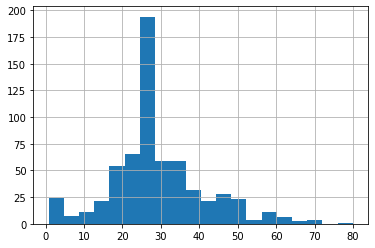

In [23]:
dftrain.age.hist(bins=20)

Text(0.5, 0, '%survived')

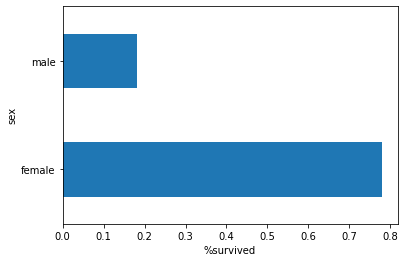

In [24]:
pd.concat([dftrain, ytrain], axis =1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel("%survived")

In [25]:
dftest.shape

(264, 9)